## Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.**

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
df= pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [4]:
number_of_users=df.shape[0]
print(number_of_users)

294478


c. The number of unique users in the dataset.

In [5]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [6]:
df_converted_users= df[df["converted"]==1]

In [7]:
print((df_converted_users.shape[0])/number_of_users)

0.11965919355605512


e. The number of times the `new_page` and `treatment` don't match.

In [8]:
result1 = df.groupby('group')['landing_page'].value_counts()
print(result1)

group      landing_page
control    old_page        145274
           new_page          1928
treatment  new_page        145311
           old_page          1965
Name: landing_page, dtype: int64


In [10]:
result1[1]+result1[3]

3893

f. Do any of the rows have missing values?

In [11]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

> no missing values

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [12]:
#get resulted rows for the query
df2 =df

result_df = df2[((df2['group']=='treatment') == (df2['landing_page']!='new_page'))|((df2['group']=='control') == (df2["landing_page"]!='old_page'))]

In [13]:
result_df.shape[0]

3893

In [14]:
#get indecies
indecies=result_df.index

# delete all rows by indecies
df2.drop(indecies , inplace=True)

#reset the dataframe
df2=df2.reset_index(drop=True)

In [15]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [16]:
df2["user_id"].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [17]:
duplicated_row_result = df2[(df2["user_id"].duplicated())==True]
duplicated_row_result["user_id"]

2862    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [18]:
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
1876,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [19]:
# delete all rows by indecies
df2.drop(duplicated_row_result.index[0] , inplace=True)

#reset the dataframe
df2=df2.reset_index(drop=True)

In [20]:
def get_percentage(probability):
    print ((probability*100 ), '%')

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [21]:
result1=(df2[df2["converted"]==1].shape[0])/(df2.shape[0])
print(result1)

0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [22]:
c_prob=(df2[(df2["group"]=='control')&(df2["converted"]==1)].shape[0])/(df2[df2["group"]=='control'].shape[0])
print(c_prob)

0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [23]:
t_prob=(df2[(df2['group']=='treatment')&(df2['converted']==1)].shape[0])/(df2[df2['group']=='treatment'].shape[0])
print(t_prob)

0.11880806551510564


d. What is the probability that an individual received the new page?

In [24]:
result4=(df2[df2['landing_page']=='new_page'].shape[0])/(df2.shape[0])
print(result4)

0.5000619442226688


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

In [25]:
print("probability of individuals converted: ") 
get_percentage(result1)
print("")

print("probability of individuals converted, who were in control group: ")
get_percentage(c_prob)
print("")

print("probability of individuals converted, who were in treatment group: ")
get_percentage(t_prob)
print("")

print("probability of individuals recived new_page")
get_percentage(result4)

probability of individuals converted: 
11.959708724499627 %

probability of individuals converted, who were in control group: 
12.03863045004612 %

probability of individuals converted, who were in treatment group: 
11.880806551510565 %

probability of individuals recived new_page
50.00619442226688 %


In [26]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


> #### according to the probabilities we get , the control group -the group with the old page- , have higher rate of conversion than the treatment group -the group with the new page-.
>
> the probability of individuals converted, who were in control group: 
12.03863045004612 %
>
> and the probability of individuals converted, who were in treatment group: 
11.880806551510565 %


> **No there is no sufficient evidence that the new page gets more conversions**
>however it appears that the old page is more effective here than the new page. we need to apply testing to get more sufficient evidence.



<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

> **the null hypothesis will be the old page is better than the new page or good as the new page**
>
> H0: p_new - p_old =< 0
>
>**and the alternative hypothesis will be that the new page is better than the old page.**
>
> H1: p_new - p_old > 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [27]:
p_new=(df2[df2["converted"]==1].shape[0])/(df2.shape[0])
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [28]:
p_old=(df2[df2["converted"]==1].shape[0])/(df2.shape[0])
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [29]:
n_new=(df2[df2["group"]=='treatment'].shape[0])
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [30]:
n_old=(df2[df2["group"]=='control'].shape[0])
n_old

145274

In [31]:
difference = p_new - p_old
difference

0.0

In [32]:
#p_mean = p_new = p_old
p_mean = (df2[df2["converted"]==1].shape[0])/(df2.shape[0])

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [33]:
new_page_converted = np.random.binomial(1, p_mean, n_new)
new_page_converted

array([1, 0, 0, ..., 0, 0, 1])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [34]:
old_page_converted = np.random.binomial(1, p_old, n_old)
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [35]:
simulation_difference = new_page_converted.mean() - old_page_converted.mean()
simulation_difference

-0.00031876527375487851

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [36]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(1, p_new, n_new)
    old_page_converted = np.random.binomial(1, p_old, n_old)
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

In [37]:
# convert to numpy array to plot
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

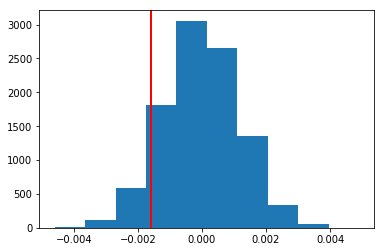

In [38]:
p_diffs = np.array(p_diffs)

'''
compute observed difference in converted rate by using the values of c_prob and t_prob from quiz part1
 -->  c_prob = probability of the individuals who converted,and who are in the control group 
 -->  t_prob =probability of the individuals who converted,and who are in the treatment group 
'''
obs_diff = t_prob - c_prob
plt.hist(p_diffs);
plt.axvline(obs_diff, color='red', linewidth=2);

> Yes, the sample mean follows a normal distribution as expected.

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [39]:
(p_diffs > obs_diff).mean()

0.90549999999999997

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**this value is the p-value, if the p-value is under 0.05 it gives an indication to reject the null hypothesis, and if it more than the 0.05 that indicates to accept the null hypithesis(fail to reject the null hypothsis).**

**in our case here the p-value is equals to 0.9054 , and as this value is larger than the 0.05, so that gives us an indication to accept the null hypothesis, as we canot conclude a segnificant difference exist**

**no difference the company will get if it implements  the new page**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [40]:
import statsmodels.api as sm

convert_old = df2[(df2['landing_page']=='old_page')&(df2['converted']==1)].shape[0]
convert_new = df2[(df2['landing_page']=='new_page')&(df2['converted']==1)].shape[0]

n_old = df2[df2['landing_page']=='old_page'].shape[0]
n_new =df2[df2['landing_page']=='new_page'].shape[0]

print(convert_old)
print(convert_new)
print("")
print(n_old)
print(n_new)

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


17489
17264

145274
145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [41]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new
], [n_old, n_new], value=None, alternative='smaller', prop_var=False)
z_score, p_value


(1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**the z-score measures standard deviation, it is a nother test of statistics to measure the significance. to decide to accept or reject the null hypothesis**
z-score is small and p-value is quite large, this is not a strong evidance againist the null.

**the p-value here is larger than the 0.05, so that gives us an indication to accept the null hypothesis, as we canot conclude a segnificant difference exist that matching the previous finding.**

**so yes they agree with our previous finding**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**logistic regression, as this problem will act as binary classification problem.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [42]:
df2.head(2)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0


In [43]:
df2['intercept']=1
df2['ab_page'] = df2['group'].map({'control':0,'treatment':1}) # converting the data into 0 , 1
df2['old_new_page'] = df2['landing_page'].map({'new_page':0,'old_page':1}) # converting the data into 0 , 1

In [44]:
#check the dataset
df2.sample(5)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,old_new_page
169233,765526,2017-01-20 05:34:12.260437,treatment,new_page,0,1,1,0
161226,700514,2017-01-22 10:54:35.155120,control,old_page,0,1,0,1
91956,798390,2017-01-05 15:07:19.023265,treatment,new_page,0,1,1,0
239214,709364,2017-01-09 13:23:45.930878,control,old_page,0,1,0,1
218386,833434,2017-01-07 06:43:04.975061,treatment,new_page,1,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [45]:
logit_mod = sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [46]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-09-15 20:01 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**that is because the regression is a two-tailed test therefore p-values have different meaning.**

**while the p-value in A/B test the null hyposesis is the old page is better than or th esame as the new page, which is one tailed test.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**it might be yes. because in the regression model we predict y in terms of x to see how the change in taht x affects y. if we add additional terms into our regression model it might affected by the new terms in a way that it doesn't really gives good prediction. we have to see what is the additional terms first and see if they are correlated to the x or not.**

**we can determine that by comparing the p-values of that variables**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [47]:
countries_df = pd.read_csv("countries.csv")

countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [48]:
new_df = df2.set_index('user_id').join(countries_df.set_index('user_id'))

In [49]:
new_df.head()

,timestamp,group,landing_page,converted,intercept,ab_page,old_new_page,country
user_id,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,US
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,US
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,US
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,US
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,US


In [50]:
new_df["country"].unique()

array(['US', 'CA', 'UK'], dtype=object)

In [51]:
new_df['US'] = new_df['country'].map({'US':1, 'CA':0, 'UK':0}) # converting the data into 0 , 1
new_df['CA'] = new_df['country'].map({'US':0, 'CA':1, 'UK':0}) # converting the data into 0 , 1
new_df['UK'] = new_df['country'].map({'US':0, 'CA':0, 'UK':1}) # converting the data into 0 , 1

In [52]:
new_logit_mod = sm.Logit(new_df['converted'],new_df[['intercept','CA','UK']])
new_results = new_logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


In [53]:
new_results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-09-15 20:01 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9967    0.0068  -292.3145  0.0000  -2.0101  -1.9833
CA           -0.0408    0.0269    -1.5178  0.1291  -0.0935   0.0119
UK            0.0099    0.0133     0.7458  0.4558  -0.0161   0.0360
==================================================================

"""

>CA is less likely to convert.
>
>UK is more likely to convert.

>no, country does not have a great impact on conversion.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [54]:
new_df['UK_new_page'] = new_df['UK'] * new_df['ab_page']
new_df['US_new_page'] = new_df['US'] * new_df['ab_page']
new_df['CA_new_page'] = new_df['CA'] * new_df['ab_page']

In [55]:
new_df.head()

,timestamp,group,landing_page,converted,intercept,ab_page,old_new_page,country,US,CA,UK,UK_new_page,US_new_page,CA_new_page
user_id,,,,,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,US,1,0,0,0,0,0
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,US,1,0,0,0,0,0
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,US,1,0,0,0,1,0
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,US,1,0,0,0,1,0
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,US,1,0,0,0,0,0


In [67]:
other_logit_mod = sm.Logit(new_df['converted'],new_df[['intercept','CA','UK','CA_new_page','UK_new_page']])
other_results = other_logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [68]:
other_results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-09-15 20:13 AIC:              212782.9259
No. Observations:   290584           BIC:              212835.8241
Df Model:           4                Log-Likelihood:   -1.0639e+05
Df Residuals:       290579           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9967    0.0068  -292.3145  0.0000  -2.0101  -1.9833
CA           -0.0073    0.0371    -0.1963  0.8444  -0.0799   0.0654
UK            0.0045    0.0175     0.2572  0.7970  -0.0298   0.0389
CA_new_page  -0.0674    0.0520    -1.2967  0.1947  -0.1694   0.0345
UK_new_page   0.0108    0.0228     0.4749  0.6349  -0.0339   0.0555
==================================================================

"""

> all the p-values except for the intercept , are above the error rate 0.05, and that indicate that there is no significant effect on conversion.

> we failed to reject the null hypothesis. old page shoud be kept. it seems that the two factors with each other giving no significant result, we could add a new factor with them in a further test like the timestamp and see if that factor will make a change in the results and mak ethe company take the best decision wether or not to implement the newpage.

## Conclusions
> this project aimed to help the company to take the decision wether or not to implement a new page , or they need much more time to run this experiment and take this decision. 

> at part 2 :
>we assumed that the old page is better than or as the same as good as the new page based --> null hypothesis
>
> from this study we get that the p-value was 0.9054 which is more than the 0.05 , so we failed to reject the null hypothesis which means that we have to keep the old page as it is better or has the same effect as the new page (implementing the new page make no difference , it might be worse than the old page).

> at part 3 :
>we used the logistic regression model to calculate the p-value. and the results we get that we failed too to reject the null hypothesis.
>
>we added another factor to our study here to see if it going to give us an indication that the new page is better than the old page.
>
>the new factor we added is the country which each user lived in. and there was no indication that the user's country make a signifficant effect in the conversion rate.
>and the p -values of the country factors are more than 0.05 which indicates that they has significant effect in the conversion rate.
>
> after we checked the individual factors of country and page on conversion, we have checked the interaction between page and country together, hoping that this time these two factors with each other gives us a significant result.
> the p-values we get from the study of the interaction between page and country  all are more than 0.05 which gives us an indication that we cant reject the null hypothesis (which is keeping the old page).

> we can add a new factor in a furthe rexperiment , that factor is the time stamp and see wether or not it would get a different results than we got so far.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

In [69]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0

## Resources

>https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html
>
>https://stackoverflow.com/questions/49814258/statsmodel-attributeerror-module-scipy-stats-has-no-attribute-chisqprob
>
>https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/
>
>https://stackoverflow.com/questions/45759966/counting-unique-values-in-a-column-in-pandas-dataframe-like-in-qlik/45760042